# Lab __4__
## Name: __Jay lunia__
## Student ID: __8947792__

In [1]:
# Importing the necessary libraries

# Basic library
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For loading the dataset
from sklearn import datasets

# For val train test split
from sklearn.model_selection import train_test_split

# For Modeling
from sklearn.linear_model import LinearRegression

# For getting polynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# For Making Pipeline
from sklearn.pipeline import Pipeline

# For Reviewing all the models 
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , r2_score


## My machine Learning Project flow Machine Learning projects

1. <a href='#s-1'>Get the data, and run a train-validation-test split</a>
2. <a href='#s-2'>Run a multivariate linear regression on all variables. </a>
3. <a href='#s-3'> Run a polynomial regression of the 2nd degree on the BMI feature alone</a>
4. <a href='#s-4'> Run a multivariate polynomial regression of the 2nd degree on all variables. </a>
5. <a href='#s-5'>Compare the three models by looking at R-squared, MAPE and MAE.</a>
6. <a href='#s-6'>Please answer the following questions.</a>

## Loading the dataset

In [2]:
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True , scaled=True) 
# returns 2 dataframes 
# 1. X(indepedent values) 
# 2. y(depedent value)

In [3]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [5]:
X.shape , y.shape # There are total 442 rows in the dataset

((442, 10), (442,))

## <div id='s-1'>1. Get the data, and run a train-validation-test split</div>

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

## <div id='s-2'> 2. Run a multivariate linear regression on all variables. <div>

In [7]:
model_all = LinearRegression()
model_all.fit(X_train,y_train)

LinearRegression()

In [8]:
# Make predictions using the testing set
y_pred_all = model_all.predict(X_val)
y_pred_train_all = model_all.predict(X_train)

In [9]:
# The coefficients and intercept
print('Coefficients or the Slope(m) of the model is: ')
cols = X.columns
equ =  f"y = {model_all.intercept_:.2f}"
for i,j in  enumerate(model_all.coef_):
    print(f'{cols[i]}\t {j}')
    equ += f'+ {j:.2f}x^{i+1}'
print('intercept(c) of the model is: \t',model_all.intercept_)
print('Equation: ',equ)

Coefficients or the Slope(m) of the model is: 
age	 7.036665297940638
sex	 -246.7830631166965
bmi	 547.2488809813499
bp	 324.79496318746726
s1	 -921.9697261034764
s2	 472.19859546224876
s3	 172.5253759472494
s4	 292.87021204245366
s5	 764.6428005649659
s6	 83.23467618359632
intercept(c) of the model is: 	 147.8363360547508
Equation:  y = 147.84+ 7.04x^1+ -246.78x^2+ 547.25x^3+ 324.79x^4+ -921.97x^5+ 472.20x^6+ 172.53x^7+ 292.87x^8+ 764.64x^9+ 83.23x^10


### Making Functions for:
- PolynomialFeatures (degree =2)
- Building the model
- Calculating the intercept , coefficients and equations
- for visualization

In [10]:
# Making function for building a pipeline
def makeModelPipe(X_data,y_data):
    model = Pipeline([('polynomial', PolynomialFeatures(degree=2 , include_bias=False)), 
                    ('linear', LinearRegression())])
    return model.fit(X_data, y_data)

In [11]:
# The coefficients and intercept
def getEqu(model):
    print('Coefficients or the Slope(m) of the model is: ')
    equ =  f"y = {model[1].intercept_:.2f}"
    for i,j in  enumerate(model[1].coef_[1:]):
        print(f'{i}\t {j}')
        equ += f'+ {j:.2f}x^{i+1}'
    print('intercept(c) of the model is: \t',model[1].intercept_)
    print('Equation: ',equ)

In [12]:
# making function for visualization
def plot_model(X, y, model):
    # Calculate the number of rows and columns for the subplots
    X_lin = np.linspace(min(X), max(X), 100)
    plt.figure(figsize=[15,7])
    plt.title('')
    plt.scatter(X, y, s=20, label="data")
    plt.plot(X_lin, model.predict(X_lin),color='r', label="Model", lw=3)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.legend()
    plt.show()

## <div id='s-3'>3. Run a polynomial regression of the 2nd degree on the `BMI` feature alone</div>

In [13]:
# Getting only the bmi data
X_train_bmi = np.array(X_train['bmi']).reshape(-1,1)
X_val_bmi = np.array(X_val['bmi']).reshape(-1,1)

In [14]:
# Make predictions using the testing set
model_bmi = makeModelPipe(X_train_bmi,y_train)
y_pred_bmi = model_bmi.predict(X_val_bmi)
y_pred_train_bmi = model_bmi.predict(X_train_bmi)


In [15]:
getEqu(model_bmi)

Coefficients or the Slope(m) of the model is: 
0	 1730.6846464001203
intercept(c) of the model is: 	 145.04962845704273
Equation:  y = 145.05+ 1730.68x^1


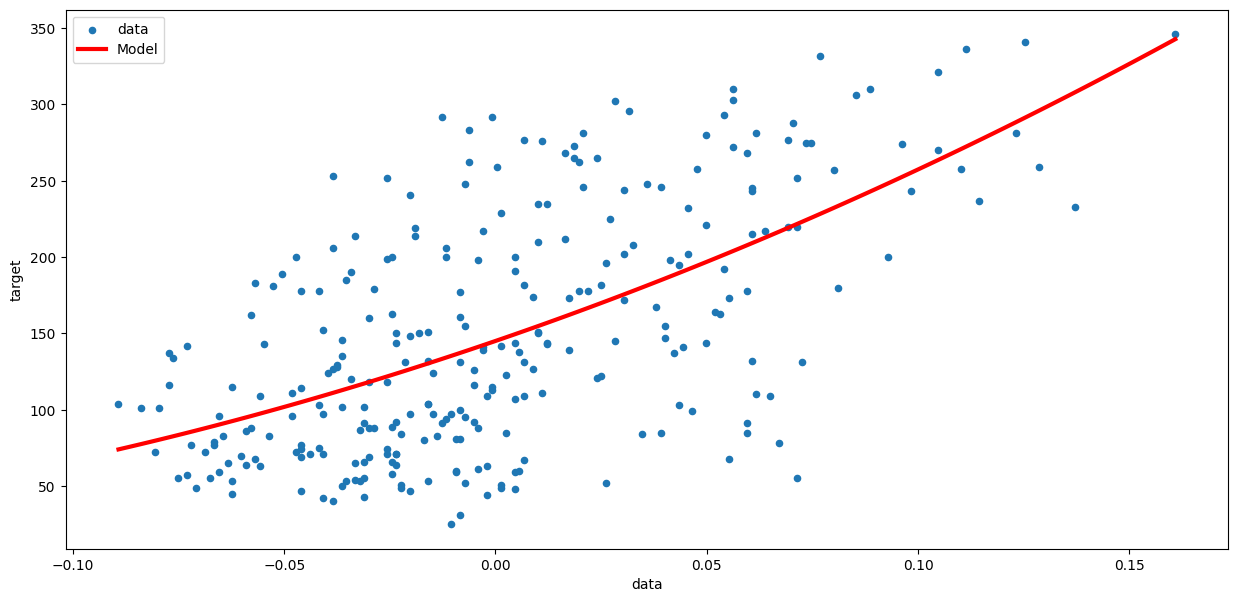

In [16]:
plot_model(X_train_bmi,y_train,model_bmi)

## <div id = 's-4'> 4. Run a multivariate polynomial regression of the 2nd degree on all variables. </div>

In [17]:
# Make predictions using the testing set
model_ploy_all = makeModelPipe(X_train,y_train)
y_pred_ploy_all = model_ploy_all.predict(X_val)
y_pred_train_ploy_all = model_ploy_all.predict(X_train)

In [18]:
getEqu(model_ploy_all)

Coefficients or the Slope(m) of the model is: 
0	 -294.2859139093853
1	 419.250776363343
2	 373.98102056357015
3	 4443.348521432445
4	 -4117.838190219827
5	 -1899.2028859037473
6	 142.32089386155633
7	 -816.3953733760126
8	 35.27746470853572
9	 2738.591227848414
10	 1976.6571896429482
11	 -532.1616544186325
12	 793.6134071015756
13	 -5275.030938462588
14	 -4391.789545967025
15	 7196.438864634534
16	 8304.097899075303
17	 2948.7673833659687
18	 323.5061560404664
19	 -1.777040256263831
20	 663.1755444658797
21	 1903.523760526171
22	 12413.643753182916
23	 -5460.869326647549
24	 -8251.882225103702
25	 -10102.474887320725
26	 -3496.209358265506
27	 421.3315779024688
28	 1867.7133016297257
29	 3535.7536603061253
30	 -15290.636049495839
31	 15623.012538283532
32	 5253.0480168743115
33	 -3454.532471000127
34	 7063.223893722994
35	 384.51994252490476
36	 -137.86926909195608
37	 28925.247496504275
38	 -22307.254339887873
39	 -12777.386203501268
40	 -1535.5952869106595
41	 -12078.985760991134
42

## <div id='s-5'>5. Compare the three models by looking at R-squared, MAPE and MAE.</div>

In [19]:
def getMetrics(y,y_pred):
    print(f'Mean Absolute Precentage error: {(mean_absolute_percentage_error(y, y_pred)*100):.2f}%')
    print(f'Mean Absolute error: {mean_absolute_error(y, y_pred):.2f}')
    print(f'The model is preforming {r2_score(y,y_pred)*100:.2f}% better than a navie model')


In [20]:
# Comparing all the models on training data
print(f'===================== On Training Data ==========================')
_ = 50
print('='*_)
print('For multi Linear Regression model')
getMetrics(y_train,y_pred_train_all)
print('='*_,end = '\n\n')

print('='*_)
print('For Polynomial Regession model on BMI')
getMetrics(y_train,y_pred_train_bmi)
print('='*_,end = '\n\n')

print('='*_)
print('For Polynomial Regession model on All data')
getMetrics(y_train,y_pred_train_ploy_all)
print('='*_,end = '\n\n')

===================== On Training Data ==========================
For multi Linear Regression model
Mean Absolute Precentage error: 39.97%
Mean Absolute error: 43.31
The model is preforming 53.06% better than a navie model

For Polynomial Regession model on BMI
Mean Absolute Precentage error: 48.05%
Mean Absolute error: 50.84
The model is preforming 37.32% better than a navie model

For Polynomial Regession model on All data
Mean Absolute Precentage error: 34.75%
Mean Absolute error: 38.45
The model is preforming 62.25% better than a navie model



In [21]:
# Comparing all the models on Validation data
print(f'===================== On Validation Data ==========================')
_ = 50
print('='*_)
print('For multi Linear Regression model')
getMetrics(y_val,y_pred_all)
print('='*_,end = '\n\n')

print('='*_)
print('For Polynomial Regession model on BMI')
getMetrics(y_val,y_pred_bmi)
print('='*_,end = '\n\n')

print('='*_)
print('For Polynomial Regession model on All data')
getMetrics(y_val,y_pred_ploy_all)
print('='*_,end = '\n\n')

===================== On Validation Data ==========================
For multi Linear Regression model
Mean Absolute Precentage error: 30.31%
Mean Absolute error: 44.59
The model is preforming 47.01% better than a navie model

For Polynomial Regession model on BMI
Mean Absolute Precentage error: 38.64%
Mean Absolute error: 52.17
The model is preforming 28.33% better than a navie model

For Polynomial Regession model on All data
Mean Absolute Precentage error: 30.38%
Mean Absolute error: 46.53
The model is preforming 34.34% better than a navie model



In [22]:
# Comparing all the models on Test data
print(f'===================== On Test Data ==========================')
_ = 50
print('='*_)
print('For multi Linear Regression model')
y_pred_test_all = model_all.predict(X_test)
getMetrics(y_test,y_pred_test_all)
print('='*_,end = '\n\n')

print('='*_)
print('For Polynomial Regession model on BMI')
y_pred_test_bmi = model_bmi.predict(np.array(X_test['bmi']).reshape(-1,1))
getMetrics(y_test,y_pred_test_bmi)
print('='*_,end = '\n\n')

print('='*_)
print('For Polynomial Regession model on All data')
y_pred_test_ploy_all = model_ploy_all.predict(X_test)
getMetrics(y_test,y_pred_test_ploy_all)
print('='*_,end = '\n\n')

===================== On Test Data ==========================
For multi Linear Regression model
Mean Absolute Precentage error: 36.83%
Mean Absolute error: 42.91
The model is preforming 45.06% better than a navie model

For Polynomial Regession model on BMI
Mean Absolute Precentage error: 44.85%
Mean Absolute error: 52.31
The model is preforming 21.70% better than a navie model

For Polynomial Regession model on All data
Mean Absolute Precentage error: 38.45%
Mean Absolute error: 45.84
The model is preforming 35.02% better than a navie model



### Insights
1. __Multi Variant Linear Regression__
    - This model is `best performing` among all the three
    - As the `r2 score` of the model `performed similar` for the test and validation data
    - also, the `MAPE` and `MAE` is also the `lowest` as compared to other models

2. __Polynomial Regression of 2nd Degree on BMI__
    - This is the worst preformed model when compared to other 2 on the basis of `r2 score`
    - However the model showed a `consistent results` for the test and validation data
    - the `MAPE` and `MAE` is also the `highest` as compared to other models

3. __Multivariate Polynomial Regression of 2nd Degree__
    - The model got `overfitted` on the training data
    - However, the model `performed average` for the test and validation data


## <div id='s-6'>6. Please answer the following questions.</div>

### 1. How many parameters are we fitting for each of the three models? Explain these values.

1. __Multi Variant Linear Regression__ : `11 parameters`
    - __X__ (Independent) values = `10 parameters`
    - __Y__ (Dependent) values = `1 parameter`
    - __Total__ : `11 parameters`

In [23]:
len(model_all.coef_) + 1 #intercept

11

2. __Polynomial Regression of 2nd Degree on BMI__ : `3 parameters`
    - __X__ (Independent) values = `2 parameters`
    - Intercept value = `1 parameter`
    - __Total__ : `3 parameters`

In [24]:
len(model_bmi[0].get_feature_names_out()) + 1 #intercept

3

3. __Multivariate Polynomial Regression of 2nd Degree__ : `65 parameters`
    - __X__ (Independent) values = `65 parameters`
    - Intercept value = `1 parameter`
    - __Total__ : `66 parameters`

In [25]:
len(model_ploy_all[0].get_feature_names_out()) + 1 #intercept

66

### 2. Which model would you choose for deployment, and why?

#### Multi Variant Linear Regression
- It has the `highest R-squared value` (0.4506), indicating that it explains more of the variance in the target variable compared to the other models.

- The Multivariate Linear Regression has the `lowest MAPE` (36.83), indicating that, on average, its predictions are closest to the actual values.

- After analyzing the results, I recommend deploying the `Multi Variant Linear Regression` model for it strikes a balance between capturing underlying patterns in the data (high R-squared) and making accurate predictions (relatively low MAE).